In [ ]:
!pip install ultralytics
!pip install unrar

In [ ]:
import os
from pathlib import Path

from ultralytics import YOLO
from google.colab import drive

## Чтение данных

In [ ]:
drive.mount('/content/drive')
path = Path("/content/drive/MyDrive/Универ/ИТМО/Глубокое обучение на практике/")

Mounted at /content/drive


In [ ]:
os.chdir(path)
os.listdir()

['.ipynb_checkpoints',
 'rtsd-dataset-sm-cls.rar',
 'yolov8s-cls.pt',
 'yolov8m-cls.pt',
 'yolov8l-cls.pt',
 'yolov8n.pt',
 'rtsd-dataset-sm-cls',
 'runs',
 'yolov8-cls.ipynb']

In [ ]:
!unrar x './rtsd-dataset-sm-cls.rar'

Выходные данные были обрезаны до нескольких последних строк (5000).
Extracting  rtsd-dataset-sm-cls/val/1_17/autosave09_11_2012_09_53_25_2_3025.jpg      79%  OK 
Extracting  rtsd-dataset-sm-cls/val/1_17/autosave09_11_2012_09_53_27_4_3026.jpg      79%  OK 
Extracting  rtsd-dataset-sm-cls/val/1_17/autosave09_11_2012_09_53_29_0_3027.jpg      79%  OK 
Extracting  rtsd-dataset-sm-cls/val/1_17/autosave09_11_2012_09_53_29_1_3028.jpg      79%  OK 
Extracting  rtsd-dataset-sm-cls/val/1_17/autosave09_11_2012_09_53_33_2_3029.jpg      79%  OK 
Extracting  rtsd-dataset-sm-cls/val/1_17/autosave09_11_2012_09_53_39_2_3030.jpg      79%  OK 
Extracting  rtsd-dataset-sm-cls/val/1_17/autosave09_11_2012_09_53_43_0_3031.jpg      79%  OK 
Extracting  rtsd-dataset-sm-cls/val/1_17/autosave09_11_2012_09_53_43_1_3032.jpg      79%  OK 
Extracting  rtsd-dataset-sm-cls/val/1_17/autosave09_11_2012_09_55_26_1_3033.jpg      79%  OK 
Extra

In [ ]:
!mkdir '/content/datasets'

mkdir: cannot create directory ‘/content/datasets’: File exists


In [ ]:
!cp -r './rtsd-dataset-sm-cls' '/content/datasets'

## Модель

In [ ]:
model_s = YOLO('yolov8s-cls.pt')
model_m = YOLO('yolov8m-cls.pt')
model_l = YOLO('yolov8l-cls.pt')

In [ ]:
results_s = model_s.train(data='rtsd-dataset-sm-cls', epochs=20)

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=rtsd-dataset-sm-cls, epochs=20, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optim

train: Scanning /content/drive/MyDrive/Универ/ИТМО/Глубокое обучение на практике/rtsd-dataset-sm-cls/train... 20000 images, 0 corrupt: 100%|██████████| 20000/20000 [00:44<00:00, 447.06it/s]


train: New cache created: /content/drive/MyDrive/Универ/ИТМО/Глубокое обучение на практике/rtsd-dataset-sm-cls/train.cache
albumentations: RandomResizedCrop(p=1.0, height=224, width=224, scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.30000000000000004, 1.7], hue=[-0.015, 0.015]), Normalize(p=1.0, mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)


val: Scanning /content/drive/MyDrive/Универ/ИТМО/Глубокое обучение на практике/rtsd-dataset-sm-cls/val... 5000 images, 0 corrupt: 100%|██████████| 5000/5000 [00:11<00:00, 452.38it/s]


val: New cache created: /content/drive/MyDrive/Универ/ИТМО/Глубокое обучение на практике/rtsd-dataset-sm-cls/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20     0.671G      3.263         16        224:   1%|          | 8/1250 [00:01<02:43,  7.57it/s]

       1/20     0.671G      3.287         16        224:   2%|▏         | 22/1250 [00:02<01:39, 12.33it/s]
100%|██████████| 755k/755k [00:00<00:00, 26.1MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.68it/s]

                   all      0.965      0.996



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.73it/s]

                   all      0.976      0.997



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.58it/s]

                   all      0.977      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.75it/s]

                   all      0.982      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.70it/s]

                   all      0.987      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.73it/s]

                   all      0.984      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:15<00:00, 10.12it/s]

                   all      0.986      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:15<00:00, 10.09it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:15<00:00, 10.29it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.614G    0.04247         16        224: 100%|██████████| 1250/1250 [01:47<00:00, 11.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:15<00:00,  9.93it/s]

                   all      0.993      0.999



      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.617G    0.04102         16        224: 100%|██████████| 1250/1250 [01:48<00:00, 11.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.78it/s]


                   all      0.991      0.999

      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.617G    0.03221         16        224: 100%|██████████| 1250/1250 [01:47<00:00, 11.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.76it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.614G    0.02619         16        224: 100%|██████████| 1250/1250 [01:47<00:00, 11.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.78it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.698G    0.02667         16        224: 100%|██████████| 1250/1250 [01:49<00:00, 11.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.67it/s]

                   all      0.994      0.999



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.614G       0.02         16        224: 100%|██████████| 1250/1250 [01:49<00:00, 11.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:15<00:00,  9.95it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


      16/20     0.617G    0.01584         16        224: 100%|██████████| 1250/1250 [01:48<00:00, 11.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:15<00:00,  9.89it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.614G    0.01672         16        224: 100%|██████████| 1250/1250 [01:47<00:00, 11.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:15<00:00, 10.16it/s]

                   all      0.993      0.999



      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.617G    0.01355         16        224: 100%|██████████| 1250/1250 [01:48<00:00, 11.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:15<00:00, 10.26it/s]

                   all      0.993      0.999



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.564G    0.01087         16        224: 100%|██████████| 1250/1250 [01:47<00:00, 11.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:15<00:00, 10.19it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      20/20     0.698G   0.009235         16        224: 100%|██████████| 1250/1250 [01:51<00:00, 11.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:15<00:00, 10.12it/s]

                   all      0.994      0.999



20 epochs completed in 0.697 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/train/weights/best.pt, 10.3MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5107225 parameters, 0 gradients, 12.5 GFLOPs
train: /content/drive/MyDrive/Универ/ИТМО/Глубокое обучение на практике/rtsd-dataset-sm-cls/train... found 20000 images in 25 classes ✅ 
val: /content/drive/MyDrive/Универ/ИТМО/Глубокое обучение на практике/rtsd-dataset-sm-cls/val... found 5000 images in 25 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.63it/s]


                   all      0.995          1
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


In [ ]:
results_m = model_m.train(data='rtsd-dataset-sm-cls', epochs=20)

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=rtsd-dataset-sm-cls, epochs=20, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opti

train: Scanning /content/drive/MyDrive/Универ/ИТМО/Глубокое обучение на практике/rtsd-dataset-sm-cls/train... 20000 images, 0 corrupt: 100%|██████████| 20000/20000 [00:00<?, ?it/s]


albumentations: RandomResizedCrop(p=1.0, height=224, width=224, scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.30000000000000004, 1.7], hue=[-0.015, 0.015]), Normalize(p=1.0, mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)


val: Scanning /content/drive/MyDrive/Универ/ИТМО/Глубокое обучение на практике/rtsd-dataset-sm-cls/val... 5000 images, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train2
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  9.08it/s]


                   all      0.963      0.995

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.68it/s]

                   all      0.959      0.994



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.26it/s]

                   all      0.969      0.995



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.51it/s]

                   all      0.983      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.25it/s]

                   all      0.975      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.30it/s]

                   all      0.986      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  9.20it/s]

                   all      0.985      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.53it/s]

                   all      0.988      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.42it/s]

                   all       0.99      0.999



      Epoch    GPU_mem       loss  Instances       Size


      10/20      1.01G    0.04232         16        224: 100%|██████████| 1250/1250 [02:03<00:00, 10.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.50it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


      11/20      1.01G    0.04499         16        224: 100%|██████████| 1250/1250 [01:58<00:00, 10.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.41it/s]

                   all       0.99      0.999



      Epoch    GPU_mem       loss  Instances       Size


      12/20         1G    0.03686         16        224: 100%|██████████| 1250/1250 [02:00<00:00, 10.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.56it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.994G    0.03059         16        224: 100%|██████████| 1250/1250 [01:59<00:00, 10.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.36it/s]

                   all      0.993      0.999



      Epoch    GPU_mem       loss  Instances       Size


      14/20         1G    0.02973         16        224: 100%|██████████| 1250/1250 [02:01<00:00, 10.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  9.15it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.996G    0.02282         16        224: 100%|██████████| 1250/1250 [02:05<00:00,  9.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  8.84it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


      16/20         1G    0.01893         16        224: 100%|██████████| 1250/1250 [02:06<00:00,  9.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.29it/s]

                   all      0.993      0.999



      Epoch    GPU_mem       loss  Instances       Size


      17/20      1.01G    0.01601         16        224: 100%|██████████| 1250/1250 [02:03<00:00, 10.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  9.10it/s]

                   all      0.994      0.999



      Epoch    GPU_mem       loss  Instances       Size


      18/20         1G    0.01411         16        224: 100%|██████████| 1250/1250 [01:59<00:00, 10.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.38it/s]

                   all      0.994      0.999



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.992G     0.0114         16        224: 100%|██████████| 1250/1250 [02:01<00:00, 10.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.67it/s]

                   all      0.994      0.999



      Epoch    GPU_mem       loss  Instances       Size


      20/20      1.01G    0.01093         16        224: 100%|██████████| 1250/1250 [01:59<00:00, 10.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.29it/s]

                   all      0.994      0.999



20 epochs completed in 0.785 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 31.7MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15794681 parameters, 0 gradients, 41.7 GFLOPs
train: /content/drive/MyDrive/Универ/ИТМО/Глубокое обучение на практике/rtsd-dataset-sm-cls/train... found 20000 images in 25 classes ✅ 
val: /content/drive/MyDrive/Универ/ИТМО/Глубокое обучение на практике/rtsd-dataset-sm-cls/val... found 5000 images in 25 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  8.96it/s]


                   all      0.994      0.999
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
Results saved to runs/classify/train2


In [ ]:
results_l = model_l.train(data='rtsd-dataset-sm-cls', epochs=20)

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8l-cls.pt, data=rtsd-dataset-sm-cls, epochs=20, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opti

train: Scanning /content/drive/MyDrive/Универ/ИТМО/Глубокое обучение на практике/rtsd-dataset-sm-cls/train... 20000 images, 0 corrupt: 100%|██████████| 20000/20000 [00:00<?, ?it/s]


albumentations: RandomResizedCrop(p=1.0, height=224, width=224, scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.30000000000000004, 1.7], hue=[-0.015, 0.015]), Normalize(p=1.0, mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)


val: Scanning /content/drive/MyDrive/Универ/ИТМО/Глубокое обучение на практике/rtsd-dataset-sm-cls/val... 5000 images, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train3
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:18<00:00,  8.54it/s]

                   all      0.968      0.995



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  8.85it/s]

                   all      0.974      0.996



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  9.16it/s]

                   all      0.973      0.996



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  9.15it/s]

                   all      0.979      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  9.14it/s]

                   all      0.976      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.24it/s]

                   all      0.986      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  9.00it/s]

                   all      0.988      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  9.13it/s]

                   all       0.99      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  9.21it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


      10/20      2.06G    0.05223         16        224: 100%|██████████| 1250/1250 [02:29<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  8.84it/s]

                   all      0.988      0.999



      Epoch    GPU_mem       loss  Instances       Size


      11/20      2.09G    0.04566         16        224: 100%|██████████| 1250/1250 [02:28<00:00,  8.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  9.12it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


      12/20      2.07G    0.03614         16        224: 100%|██████████| 1250/1250 [02:28<00:00,  8.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  8.78it/s]

                   all      0.991      0.999



      Epoch    GPU_mem       loss  Instances       Size


      13/20       2.1G    0.02824         16        224: 100%|██████████| 1250/1250 [02:24<00:00,  8.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  8.85it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


      14/20      2.09G    0.02999         16        224: 100%|██████████| 1250/1250 [02:27<00:00,  8.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  8.90it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


      15/20      2.06G    0.02406         16        224: 100%|██████████| 1250/1250 [02:23<00:00,  8.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  8.95it/s]

                   all      0.993      0.999



      Epoch    GPU_mem       loss  Instances       Size


      16/20      2.09G     0.0205         16        224: 100%|██████████| 1250/1250 [02:25<00:00,  8.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  9.05it/s]

                   all      0.993      0.999



      Epoch    GPU_mem       loss  Instances       Size


      17/20      2.06G    0.01611         16        224: 100%|██████████| 1250/1250 [02:28<00:00,  8.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  9.04it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


      18/20      2.06G    0.01474         16        224: 100%|██████████| 1250/1250 [02:24<00:00,  8.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  8.99it/s]

                   all      0.992      0.999



      Epoch    GPU_mem       loss  Instances       Size


      19/20      2.06G    0.01029         16        224: 100%|██████████| 1250/1250 [02:25<00:00,  8.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:16<00:00,  9.26it/s]

                   all      0.994      0.999



      Epoch    GPU_mem       loss  Instances       Size


      20/20       2.1G   0.008636         16        224: 100%|██████████| 1250/1250 [02:31<00:00,  8.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:17<00:00,  8.77it/s]


                   all      0.994      0.999

20 epochs completed in 1.016 hours.
Optimizer stripped from runs/classify/train3/weights/last.pt, 72.6MB
Optimizer stripped from runs/classify/train3/weights/best.pt, 72.6MB

Validating runs/classify/train3/weights/best.pt...
Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36216601 parameters, 0 gradients, 98.7 GFLOPs
train: /content/drive/MyDrive/Универ/ИТМО/Глубокое обучение на практике/rtsd-dataset-sm-cls/train... found 20000 images in 25 classes ✅ 
val: /content/drive/MyDrive/Универ/ИТМО/Глубокое обучение на практике/rtsd-dataset-sm-cls/val... found 5000 images in 25 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 157/157 [00:19<00:00,  8.16it/s]


                   all      0.994      0.999
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3
Results saved to runs/classify/train3


## Результаты

In [ ]:
os.chdir('/content')

In [ ]:
model_s = YOLO('model-s.pt')
model_m = YOLO('model-m.pt')
model_l = YOLO('model-l.pt')

### Small model

In [ ]:
model_s.info()

YOLOv8s-cls summary: 99 layers, 5112761 parameters, 0 gradients, 12.6 GFLOPs


(99, 5112761, 0, 12.611379199999998)

In [ ]:
metrics_s = model_s.val(data='rtsd-dataset-sm-cls')

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-cls summary (fused): 73 layers, 5107225 parameters, 0 gradients, 12.5 GFLOPs
train: /content/datasets/rtsd-dataset-sm-cls/train... found 20000 images in 25 classes ✅ 
val: /content/datasets/rtsd-dataset-sm-cls/val... found 5000 images in 25 classes ✅ 
test: None...


val: Scanning /content/datasets/rtsd-dataset-sm-cls/val... 5000 images, 0 corrupt: 100%|██████████| 5000/5000 [00:00<00:00, 5118.21it/s]


val: New cache created: /content/datasets/rtsd-dataset-sm-cls/val.cache


               classes   top1_acc   top5_acc:  24%|██▍       | 75/313 [00:01<00:04, 50.26it/s]

               classes   top1_acc   top5_acc:  48%|████▊     | 149/313 [00:03<00:05, 31.38it/s]
100%|██████████| 755k/755k [00:00<00:00, 78.3MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:09<00:00, 31.42it/s]


                   all      0.995          1
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


In [ ]:
for stage, time in metrics_s.speed.items():
    print(f'{stage} speed {time:.3f} ms')

preprocess speed 0.098 ms
inference speed 0.954 ms
loss speed 0.002 ms
postprocess speed 0.001 ms


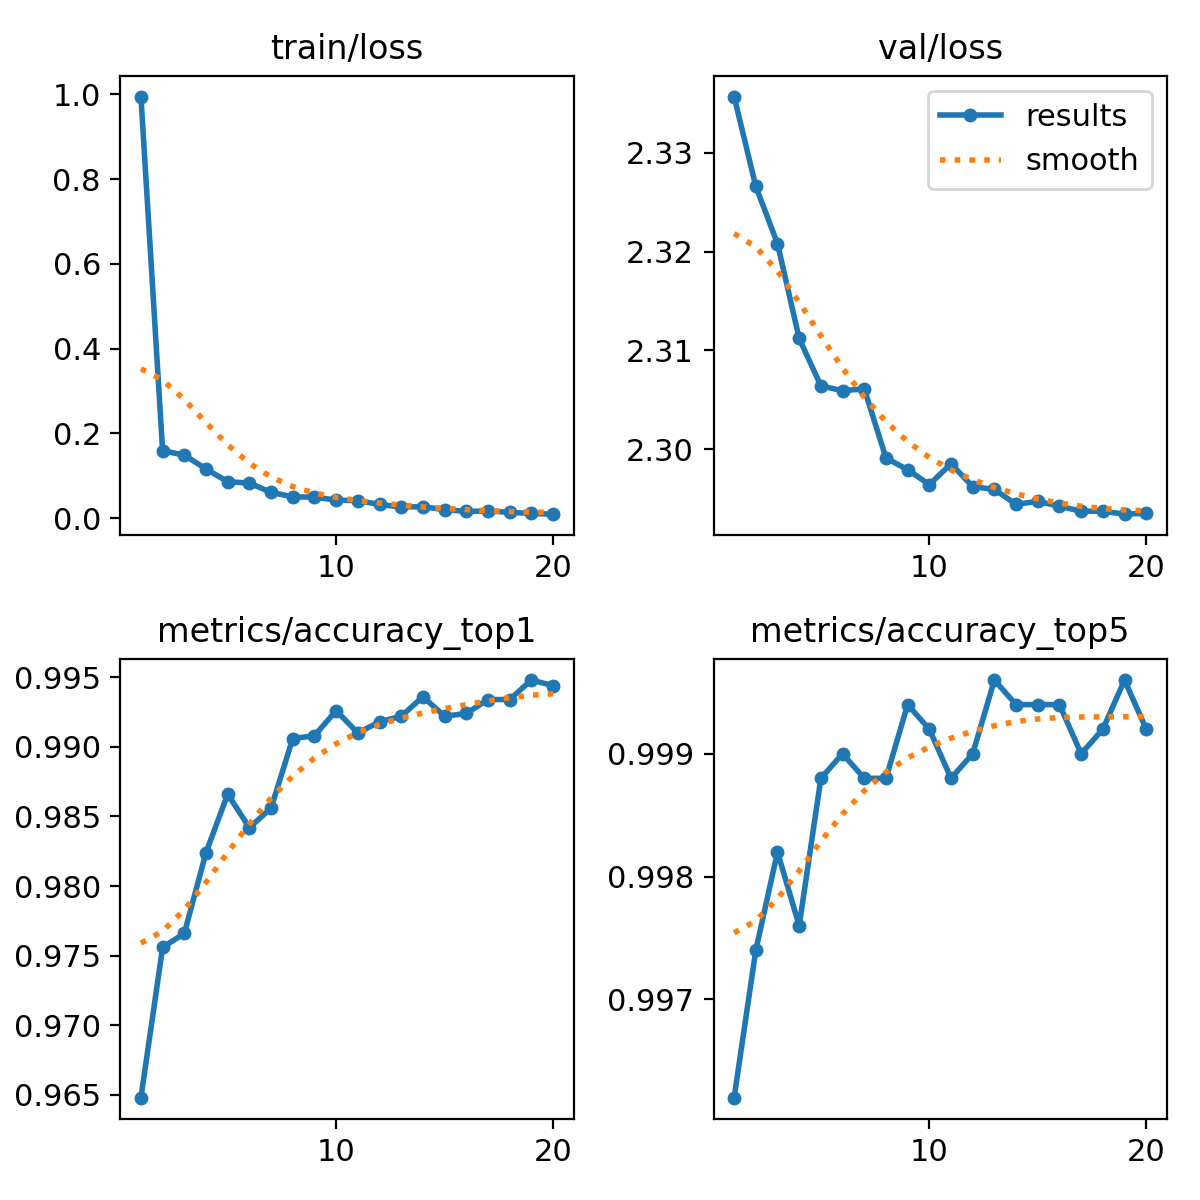
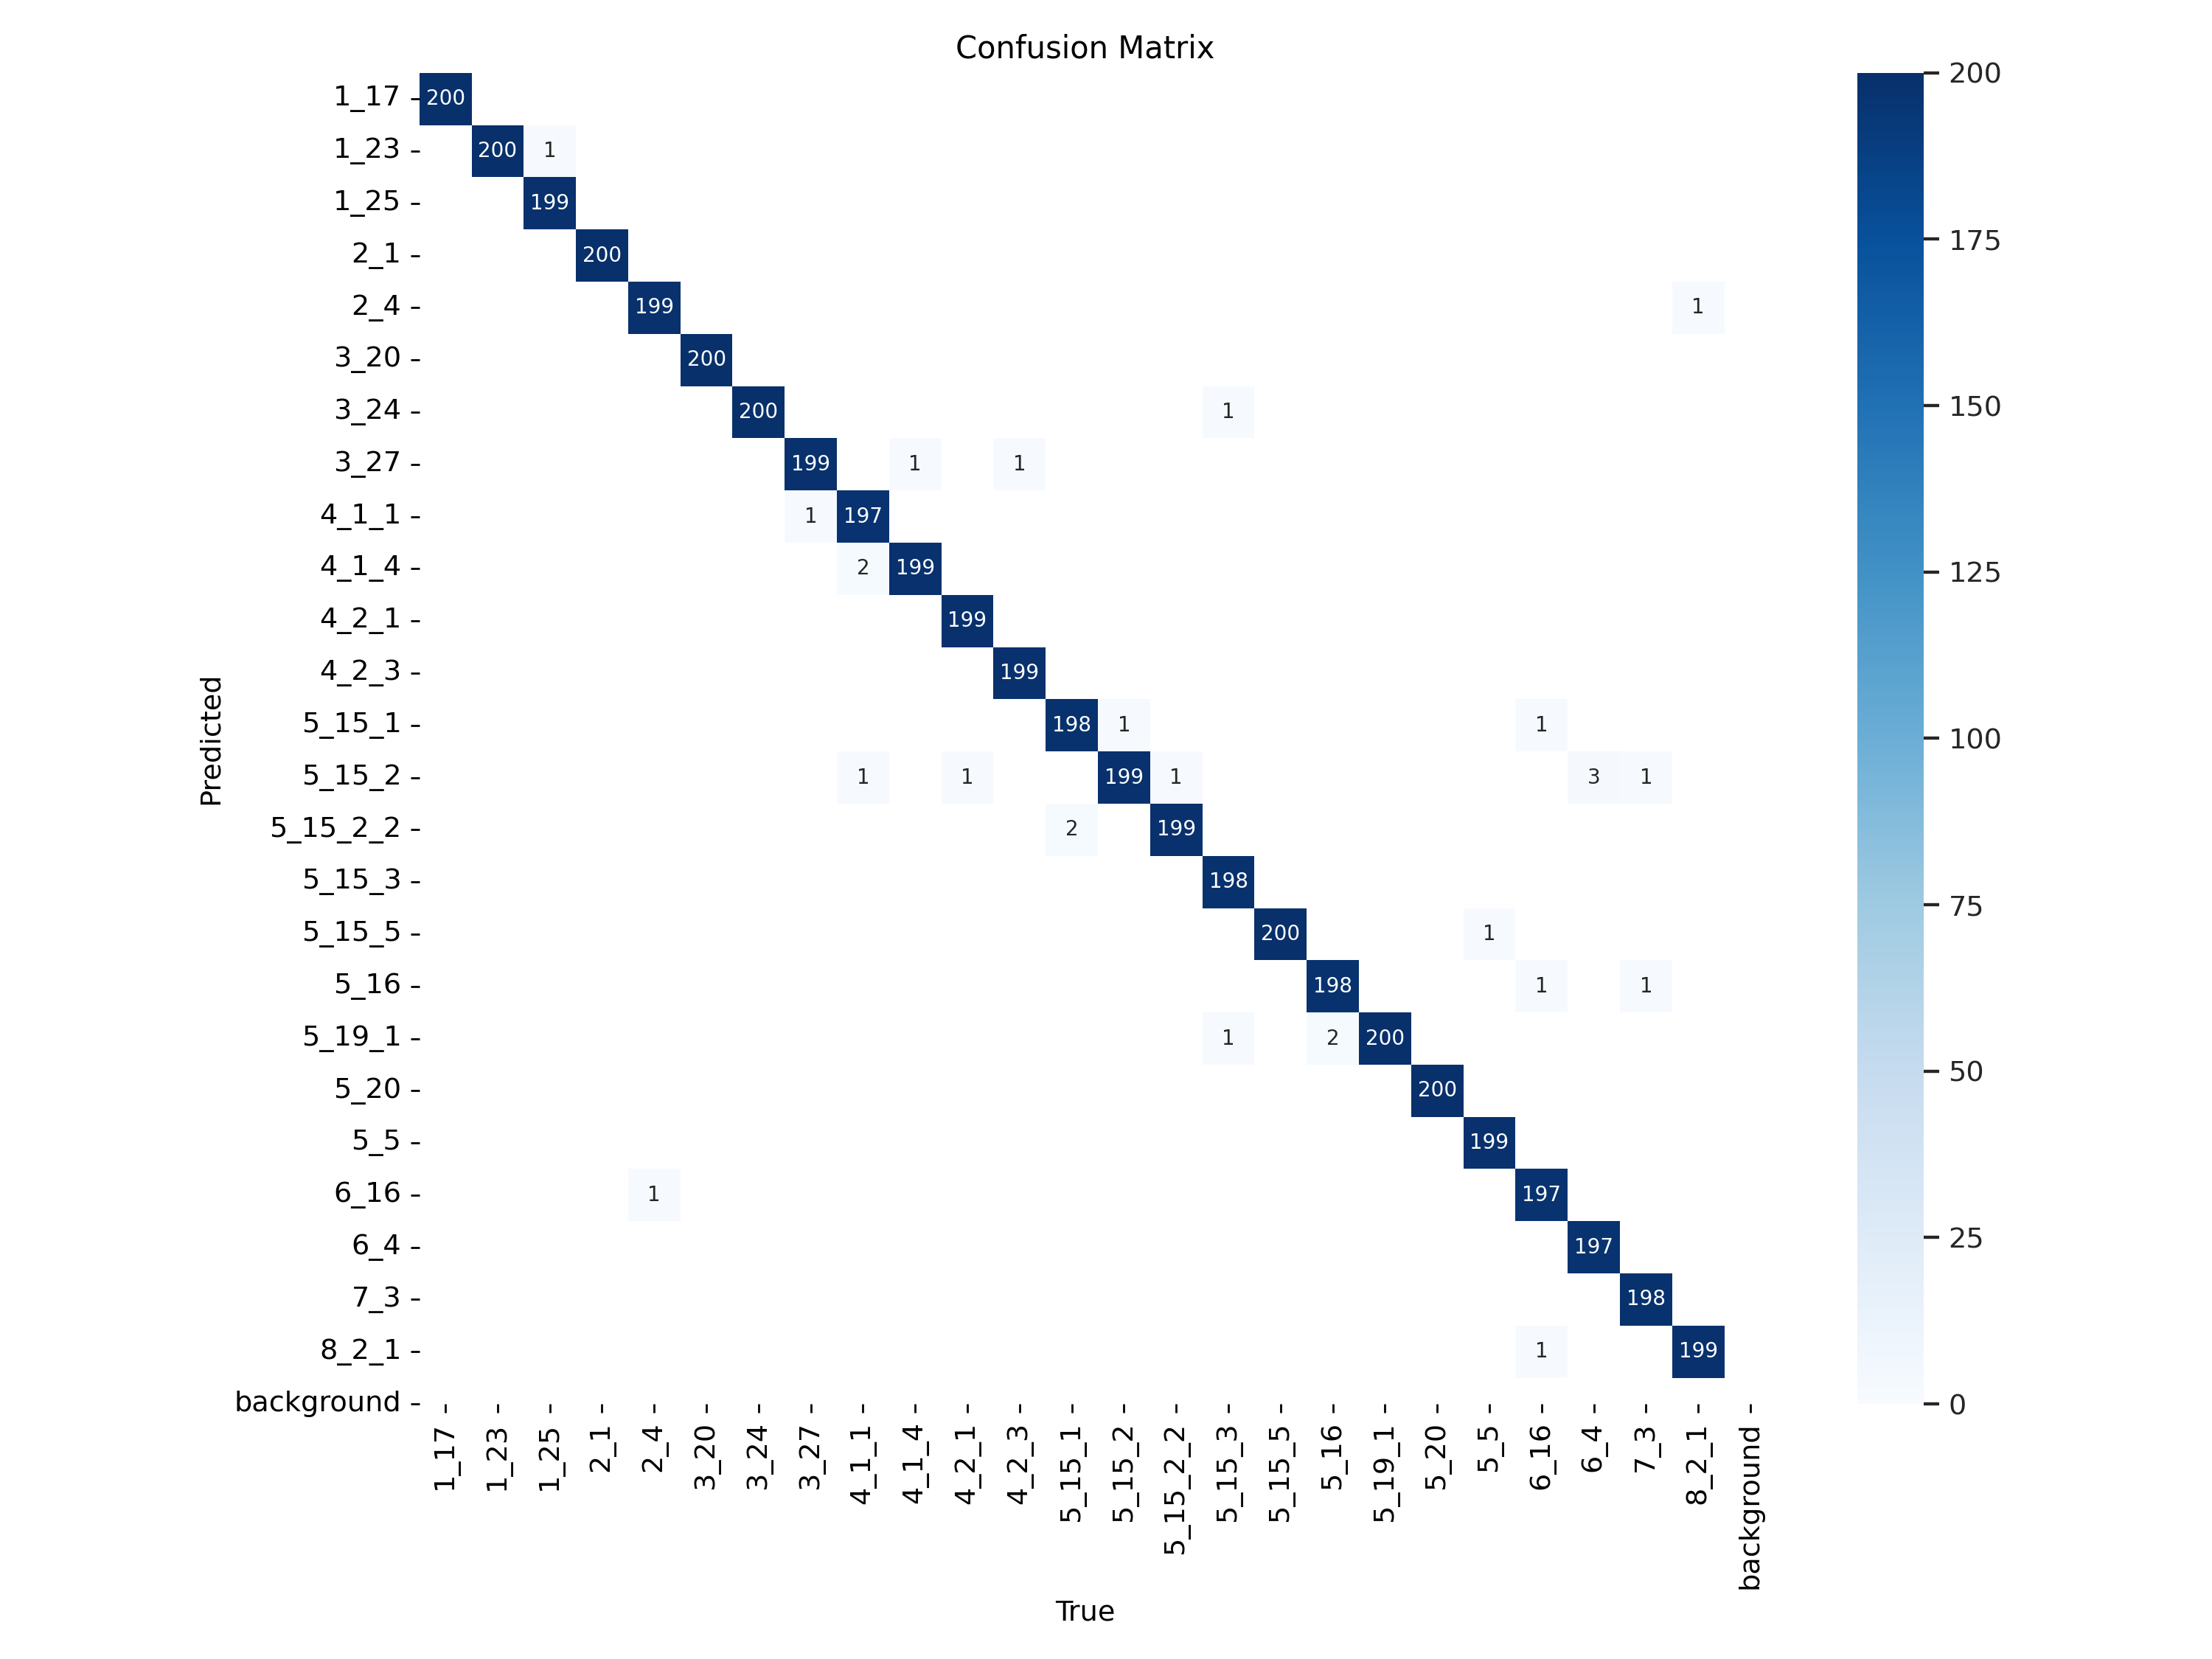

### Medium model

In [ ]:
model_m.info()

YOLOv8m-cls summary: 141 layers, 15804361 parameters, 0 gradients, 41.9 GFLOPs


(141, 15804361, 0, 41.9166208)

In [ ]:
metrics_m = model_m.val(data='rtsd-dataset-sm-cls')

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15794681 parameters, 0 gradients, 41.7 GFLOPs
train: /content/datasets/rtsd-dataset-sm-cls/train... found 20000 images in 25 classes ✅ 
val: /content/datasets/rtsd-dataset-sm-cls/val... found 5000 images in 25 classes ✅ 
test: None...


val: Scanning /content/datasets/rtsd-dataset-sm-cls/val... 5000 images, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:10<00:00, 30.77it/s]


                   all      0.994      0.999
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val2


In [ ]:
for stage, time in metrics_m.speed.items():
    print(f'{stage} speed {time:.3f} ms')

preprocess speed 0.100 ms
inference speed 1.561 ms
loss speed 0.001 ms
postprocess speed 0.001 ms


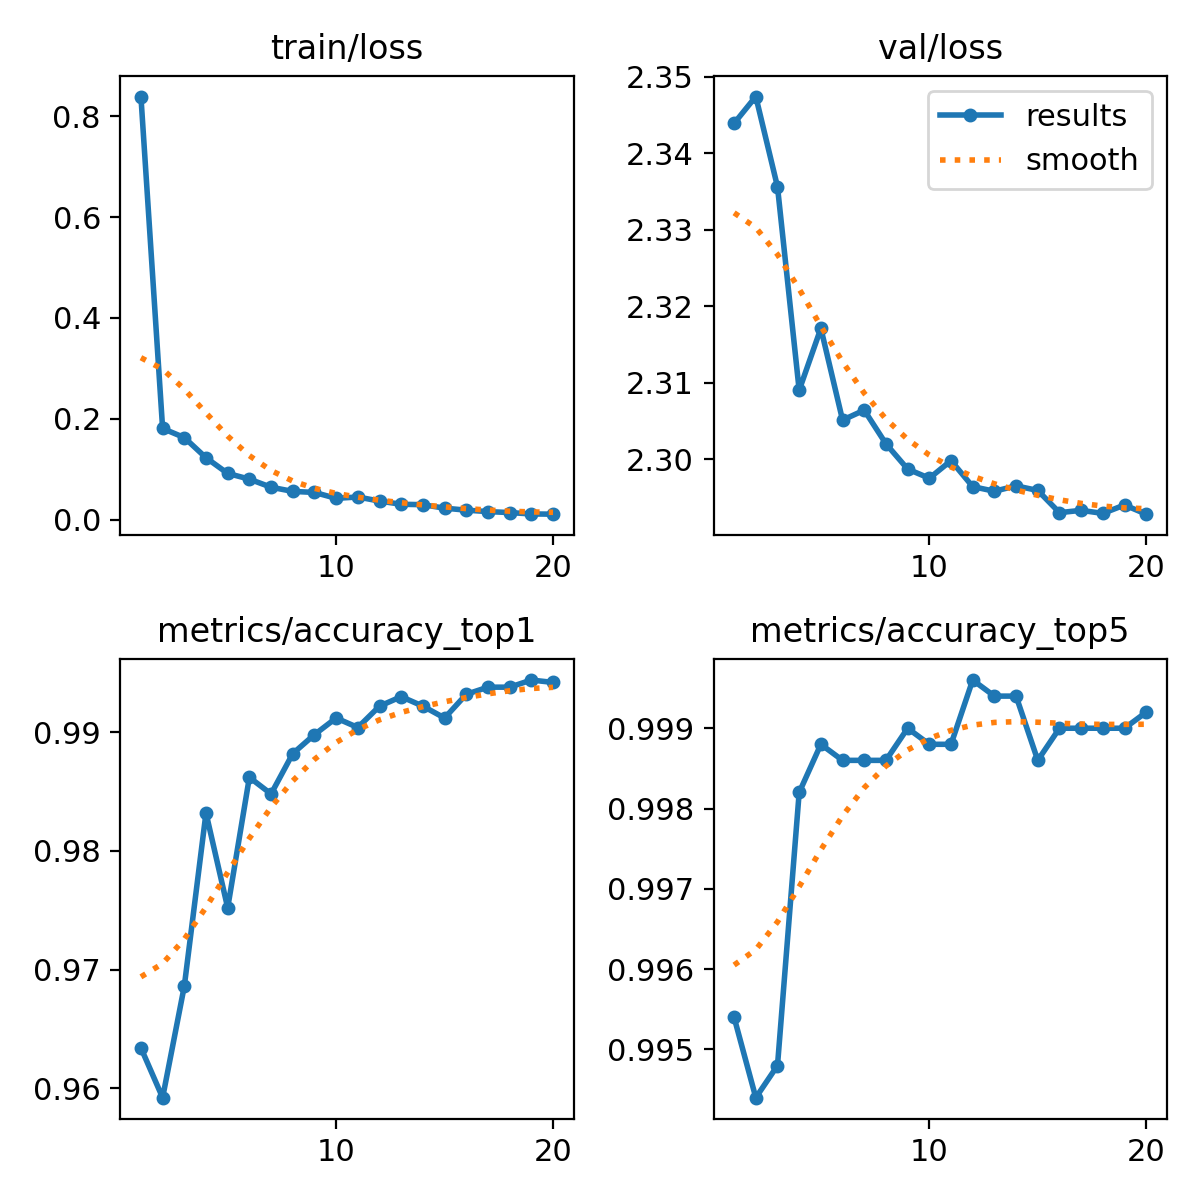
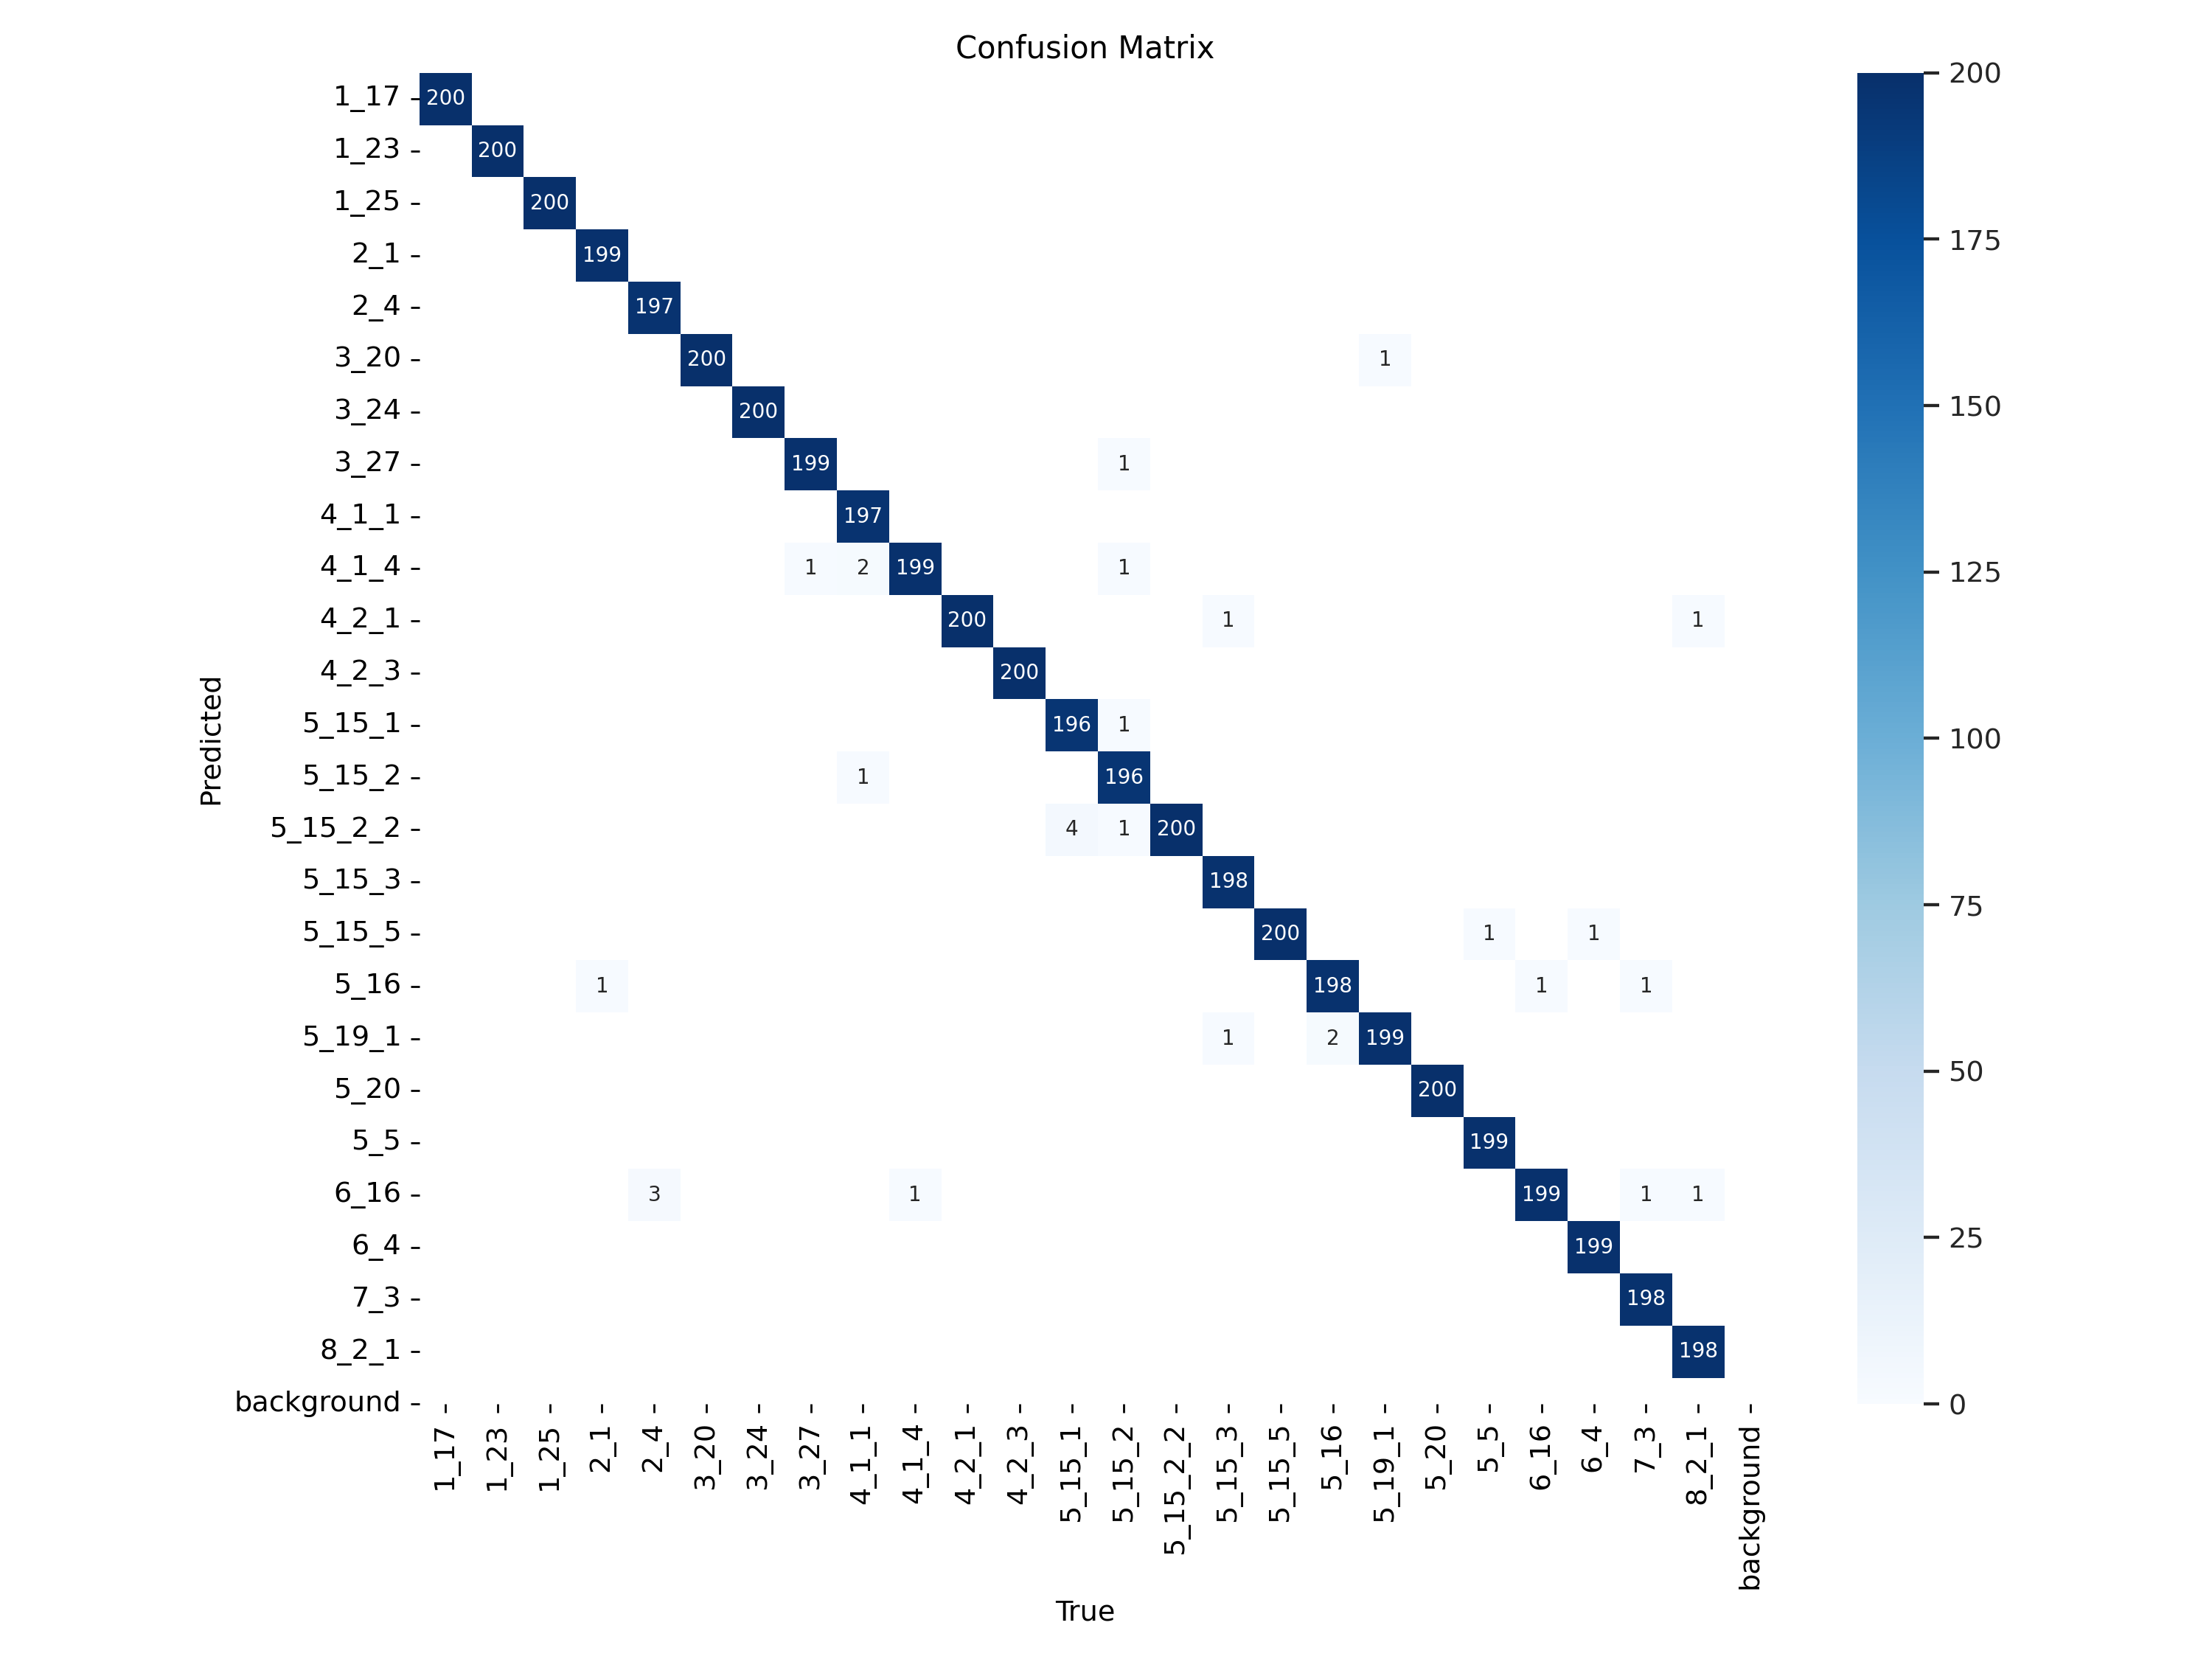

### Large model

In [ ]:
model_l.info()

YOLOv8l-cls summary: 183 layers, 36231769 parameters, 0 gradients, 99.1 GFLOPs


(183, 36231769, 0, 99.14839040000001)

In [ ]:
metrics_l = model_l.val(data='rtsd-dataset-sm-cls')

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-cls summary (fused): 133 layers, 36216601 parameters, 0 gradients, 98.7 GFLOPs
train: /content/datasets/rtsd-dataset-sm-cls/train... found 20000 images in 25 classes ✅ 
val: /content/datasets/rtsd-dataset-sm-cls/val... found 5000 images in 25 classes ✅ 
test: None...


val: Scanning /content/datasets/rtsd-dataset-sm-cls/val... 5000 images, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:16<00:00, 19.03it/s]


                   all      0.994      0.999
Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val3


In [ ]:
for stage, time in metrics_l.speed.items():
    print(f'{stage} speed {time:.3f} ms')

preprocess speed 0.150 ms
inference speed 2.773 ms
loss speed 0.001 ms
postprocess speed 0.001 ms


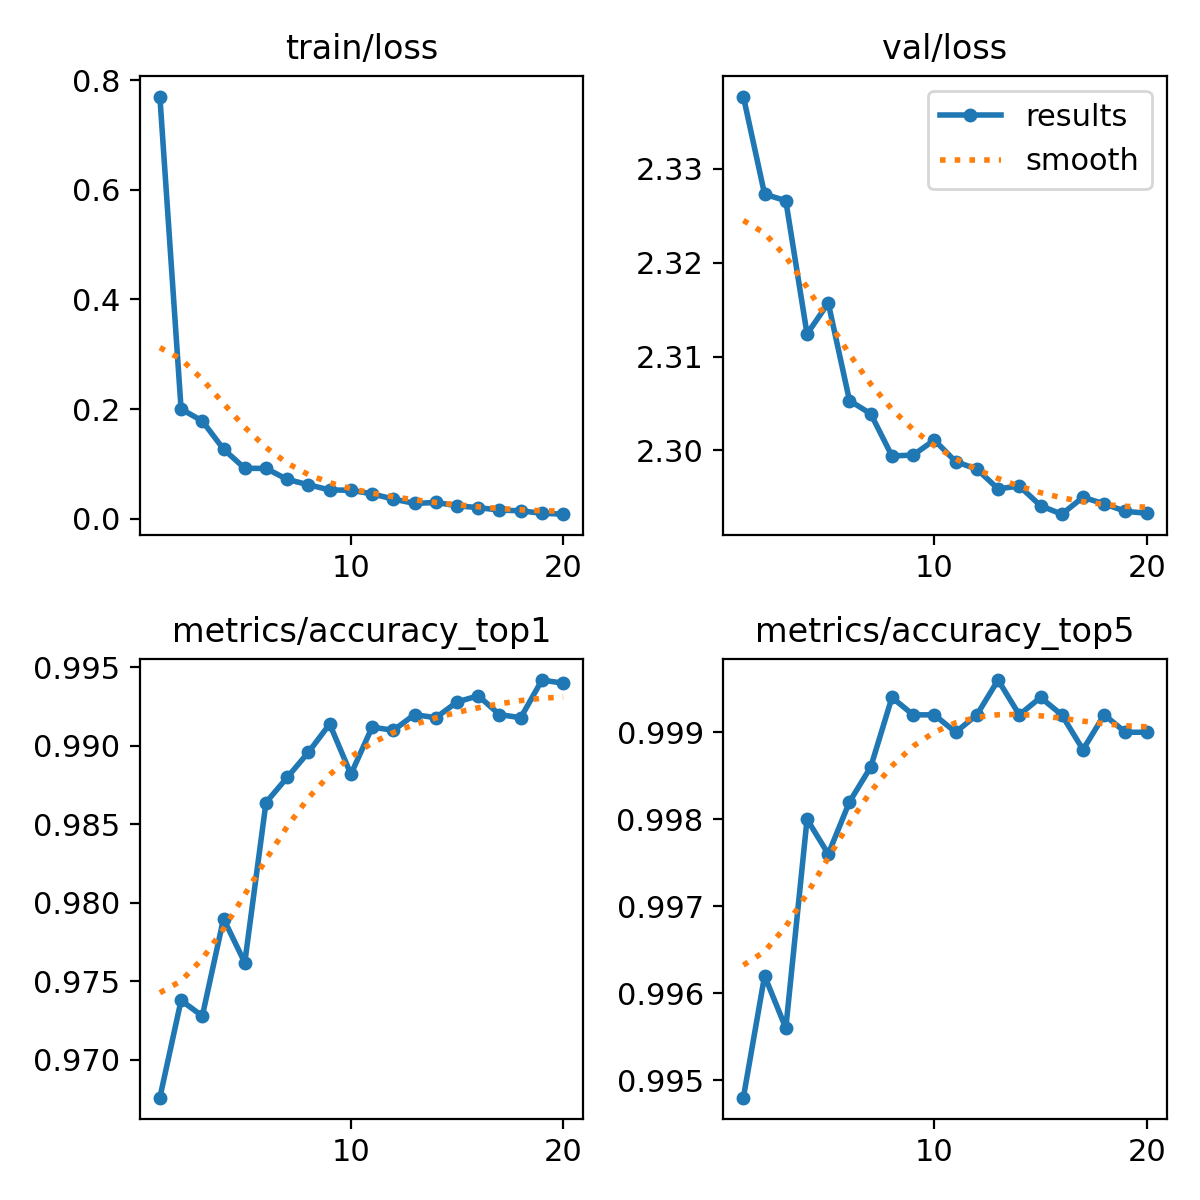
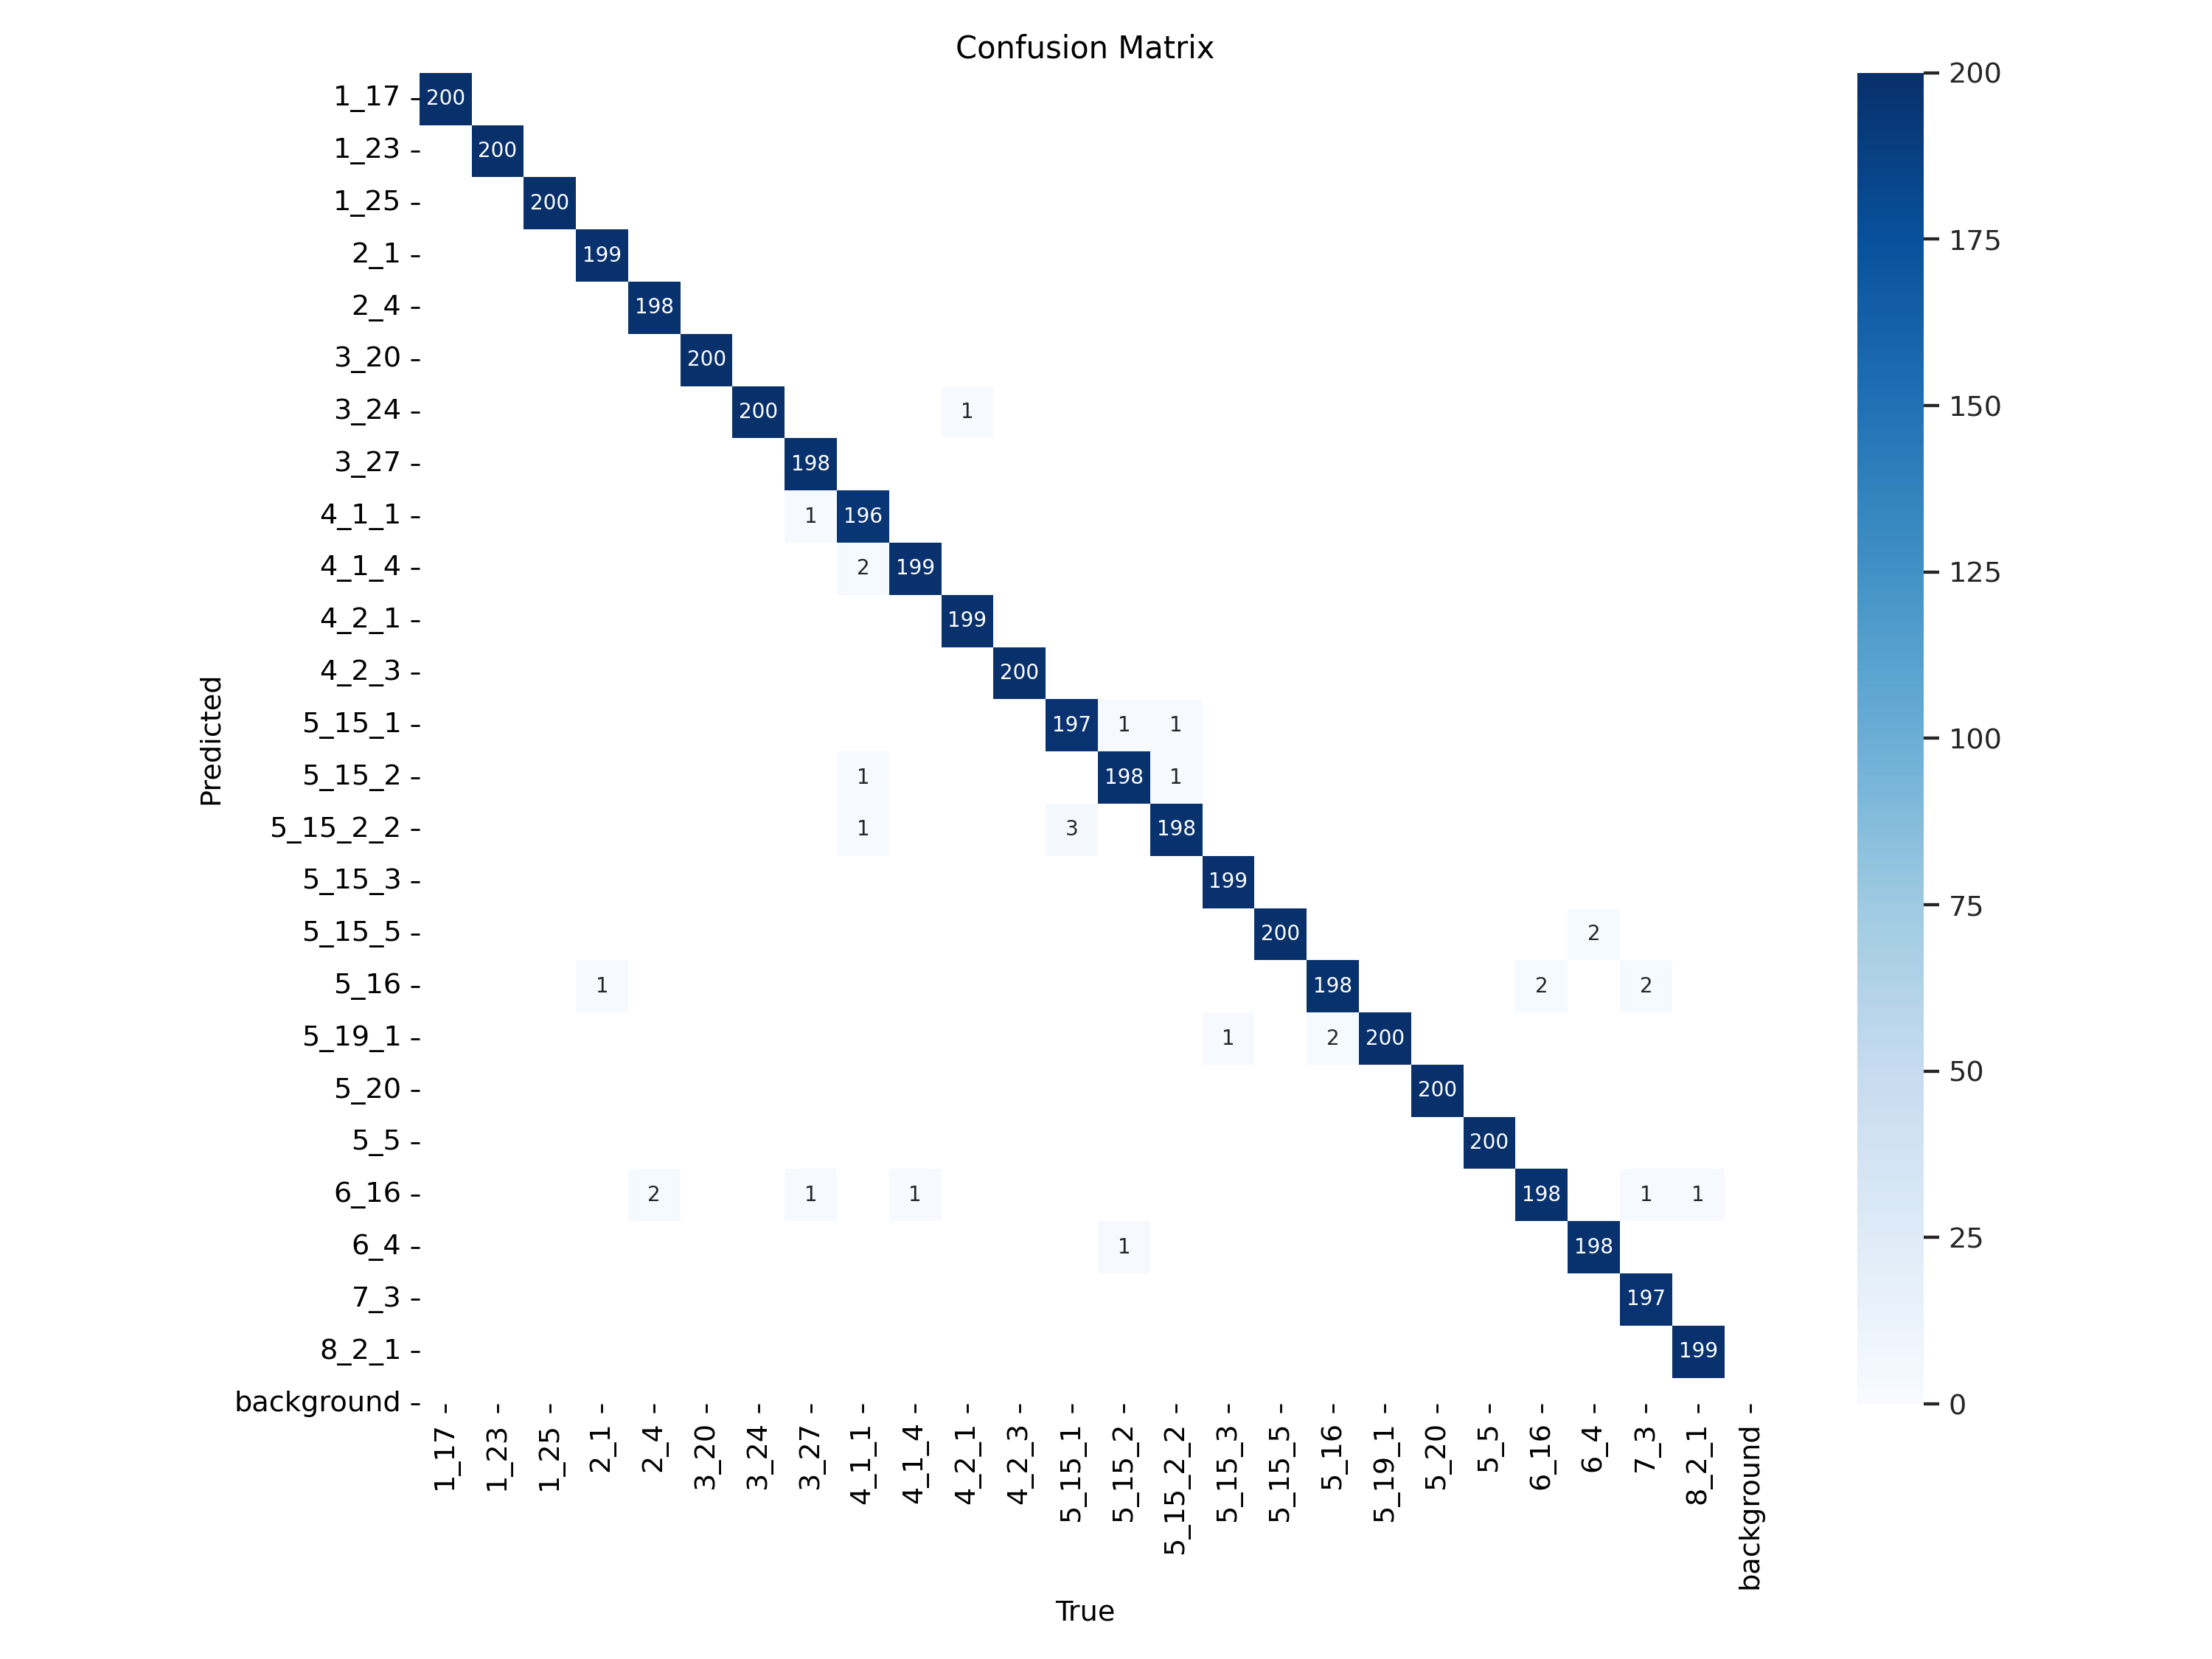